### Imprt libraries and read the data

In [160]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from scipy import stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV


In [161]:
X_train = pd.read_csv('./Test/X_test.csv')

X_train.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_1602,1,0,0,23,0,True,0,True,18.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,90.38,23.0
1,Candidate_29650,1,0,2,4,2,True,2,True,16.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,532.93,16.0
2,Candidate_31061,1,2,3,38,1,False,4,True,29.99,...,6.0,6.0,0.0,0.0,5000.0,4334.59,-82.0,80.0,169.78,22.0
3,Candidate_5768,1,1,28,20,2,False,2,True,17.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,270.02,13.0
4,Candidate_27059,1,1,15,1,3,False,5,False,28.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,103.41,14.0


Checking the data types:

In [162]:
print (X_train.dtypes)

Unique_ID     object
C1             int64
C2             int64
C3             int64
C4             int64
C5             int64
C6              bool
C7             int64
C8              bool
N1           float64
N2           float64
N3           float64
N4           float64
N5           float64
N6           float64
N7           float64
N8             int64
N9             int64
N10          float64
N10.1        float64
N11          float64
N12          float64
N14          float64
N15          float64
N16          float64
N17          float64
N18          float64
N19          float64
N20          float64
N21          float64
N22          float64
N23          float64
N24          float64
N25          float64
N26          float64
N27          float64
N28          float64
N29          float64
N30          float64
N31          float64
N32          float64
N33          float64
N34          float64
N35          float64
dtype: object


The column data types seem correct


Categorical cols are C6 and C8

In [163]:
nrows, ncols = X_train.shape[0], X_train.shape[1]

In [164]:
cols = list(X_train.columns)


### Check statistical summary of each col

This only considers numerical values

In [165]:
# first 15 cols description

X_train[cols[:16]].describe(include='all')

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,N3,N4,N5,N6,N7
count,11017,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017,11017.000000,11017,11017.000000,9528.000000,10905.000000,9529.000000,9529.000000,10905.000000,10888.000000
unique,11017,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Candidate_9050,NaN,NaN,NaN,NaN,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,5821,NaN,10154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.125533,2.463647,12.883997,14.488427,1.735046,NaN,3.117636,NaN,20.092037,81.279492,3.360064,9.529961,8.288488,3.455064,25.271400
std,NaN,0.409512,3.409954,11.964840,15.628293,1.324165,NaN,2.133982,NaN,8.149355,83.802131,0.404097,5.533917,4.935158,0.404097,14.153371
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.095000,2.000000
25%,NaN,1.000000,0.000000,2.000000,1.000000,1.000000,NaN,2.000000,NaN,13.500000,21.000000,3.200000,6.000000,5.000000,3.295000,15.000000
50%,NaN,1.000000,1.000000,10.000000,10.000000,2.000000,NaN,4.000000,NaN,19.500000,53.000000,3.400000,9.000000,8.000000,3.495000,23.000000
75%,NaN,1.000000,3.000000,20.000000,24.000000,2.000000,NaN,4.000000,NaN,26.990000,114.000000,3.600000,13.000000,11.000000,3.695000,33.000000


In [166]:
# next 15 cols desc

X_train[cols[15:31]].describe(include='all')

,N7,N8,N9,N10,N10.1,N11,N12,N14,N15,N16,N17,N18,N19,N20,N21,N22
count,10888.000000,11017.000000,11017.000000,10888.000000,10888.000000,10799.000000,9526.000000,10829.000000,10888.000000,9529.000000,9529.000000,9529.000000,9546.000000,9546.000000,9546.000000,9546.000000
mean,25.271400,6.066897,327.284560,0.892910,2.081007,7.312159,1112.026034,4.681042,0.334129,0.024032,15937.365096,0.532040,10639.636706,21.797821,0.855390,0.909596
std,14.153371,4.532078,446.366043,2.479106,3.212314,8.317780,6851.596648,11.033977,0.795091,0.184830,34110.197505,0.350171,21248.127059,12.352030,0.176756,1.266938
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,3.000000,60.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1587.000000,0.210000,500.000000,13.000000,0.770000,0.000000
50%,23.000000,5.000000,185.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,6250.000000,0.570000,3211.000000,20.000000,0.920000,1.000000
75%,33.000000,8.000000,418.000000,1.000000,3.000000,9.000000,0.000000,4.000000,0.000000,0.000000,16193.000000,0.860000,11986.000000,29.000000,1.000000,1.000000
max,118.000000,47.000000,8001.000000,45.000000,63.000000,158.000000,223738.000000,99.000000,16.000000,4.000000,668848.000000,2.350000,572427.000000,102.000000,1.000000,17.000000


In [167]:
# remaining cols desc

X_train[cols[31:]].describe(include='all')

,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
count,10168.000000,11017.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2112.000000,11017.000000,11017.000000,10888.000000
mean,57.714576,5045.143853,1.321796,20.024790,19.379326,0.577643,0.066885,6995.496043,2180.824972,1.303504,125.209108,223.843161,19.606539
std,144.416443,4664.443548,0.671850,15.556284,15.135256,2.147313,0.762798,6247.803063,3105.571653,49.867054,104.491638,185.433746,7.332430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-164.000000,20.000000,0.000000,3.000000
25%,26.000000,2783.333333,1.000000,9.000000,9.000000,0.000000,0.000000,3000.000000,0.000000,-32.000000,54.000000,98.740000,15.000000
50%,40.000000,4166.666667,1.000000,15.000000,15.000000,0.000000,0.000000,5000.000000,872.345000,0.000000,90.000000,172.760000,19.000000
75%,62.000000,6250.000000,1.000000,29.000000,28.000000,0.000000,0.000000,9000.000000,3303.902500,30.000000,160.000000,302.140000,24.000000
max,2002.000000,185081.750000,7.000000,116.000000,114.000000,40.000000,21.000000,53200.000000,21723.490000,221.000000,700.000000,2251.510000,57.000000


For the summary statts we can see:

- many cols have missing values
- many cols have limited range. Foe eg: C1 has min of 1 and max of 3. So, these cols might be categorical, which have numerical labelling


We now want to store the no of missing values for each col, to be used later for **Missing Value Treatment**



In [168]:
def make_missing_value_dict(df):
    """
    function to return a dict representing number of missing values in each col of passed df
    """
    cols = df.columns
    missing_values_dict = {}

    for col in cols[1:]:
        missing_value = nrows - int(df.describe(include='all').loc['count', col])
        missing_values_dict[col] = missing_value

    return missing_values_dict

print (make_missing_value_dict(X_train))

{'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0, 'C5': 0, 'C6': 0, 'C7': 0, 'C8': 0, 'N1': 0, 'N2': 1489, 'N3': 112, 'N4': 1488, 'N5': 1488, 'N6': 112, 'N7': 129, 'N8': 0, 'N9': 0, 'N10': 129, 'N10.1': 129, 'N11': 218, 'N12': 1491, 'N14': 188, 'N15': 129, 'N16': 1488, 'N17': 1488, 'N18': 1488, 'N19': 1471, 'N20': 1471, 'N21': 1471, 'N22': 1471, 'N23': 849, 'N24': 0, 'N25': 8879, 'N26': 8879, 'N27': 8879, 'N28': 8879, 'N29': 8879, 'N30': 8879, 'N31': 8879, 'N32': 8905, 'N33': 0, 'N34': 0, 'N35': 129}


In [169]:
# check cols which have less than 1% unique values: possibly encode them as categorical

for col in cols:
    if len(X_train[col].unique())*100/nrows < 1:
        print (col)

C1
C2
C3
C4
C5
C6
C7
C8
N3
N4
N5
N6
N7
N8
N10
N10.1
N11
N14
N15
N16
N20
N21
N22
N25
N26
N27
N28
N29
N35


NOTE: All these cols have very few unique values, so maybe encode them as Categorical

### Missing Value Treatment and Outlier Detection and Correction

Strategy:

1. If column contains no missing values, we check number of distinct values

2. If less than 20, it makes better sense to consider this column as categorical. So we One-Hot encode them. For eg: C1 has 3 distinct values 1,2 and 3. So we create 3 cols C1_1, C1_2 and C1_3 to represent that

3. If column has a lot of outliers, we isolate the outliers (based on 1.5\*IQR) and see if these outliers affect the distribution of the target variable. If they do, we keep the outliers as is, else we replace them by the median. Outliers are values which are more than 1.5 times upper quartile and lower than 1.5 times lower quartile : [ref](https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/)

4. If the column also contains missing values, we impute the mssing values by median as it is less sensitive to outliers


In [170]:
# make a copy of the X train to run MVT on
X_train_mvt1 = X_train.copy(deep=True)

N25, N26, N27, N28, N29, N30, N31, N32 have over 80% missing values. 

There are 2 approaches I have considered:

1. Drop these columns entirely

2. Replace missing values with 0 and create a column indicating if that corr value was missing or not


However in after we run feature selection, none of these features prove to be important, so either approaches can be used

In [171]:
#X_train_mvt1.drop(columns=['N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32'], inplace=True)


# function to Replace missing values with 0 and create a column indicating if that corr value was missing or not
def mvt_special_cols(cols):
    """
    Replace missing values with 0 and create a column indicating if that corr value was missing or not
    """
    
    for col in cols:

        value_missing = []

        new_list = []

        for x in range(len(X_train_mvt1['N25'])):
            # print (X_train_mvt1['N25'][x])
            if np.isnan(X_train_mvt1['N25'][x]):
                value_missing.append(True)
                new_list.append(0)
            else:
                value_missing.append(False)
                new_list.append(X_train_mvt1['N25'][x])

        new_col_name = col + '_missing'

        X_train_mvt1[col] = new_list
        X_train_mvt1[new_col_name] = value_missing
    
mvt_special_cols(['N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32'])

In [172]:
X_train_mvt1.columns

Index(['Unique_ID', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2',
       'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12',
       'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23',
       'N24', 'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33',
       'N34', 'N35', 'N25_missing', 'N26_missing', 'N27_missing',
       'N28_missing', 'N29_missing', 'N30_missing', 'N31_missing',
       'N32_missing'],
      dtype='object')

### C1 - C8 are categorical cols with numeric encoding. So we one hot encode them

#### Analyse col C1

In [173]:
# check no of unique values and dtype of col

print (len(X_train_mvt1['C1'].unique()), X_train_mvt1['C1'].dtype)

3 int64


Only 3 distinct values.. Better to represent them as categories and one-hot encode them

In [174]:
X_train_mvt1['C1'] = X_train_mvt1['C1'].astype('object')

X_train_mvt1 = pd.get_dummies(data=X_train_mvt1, columns=['C1'])

print (X_train_mvt1.columns)

Index(['Unique_ID', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14',
       'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24',
       'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N34',
       'N35', 'N25_missing', 'N26_missing', 'N27_missing', 'N28_missing',
       'N29_missing', 'N30_missing', 'N31_missing', 'N32_missing', 'C1_1',
       'C1_2', 'C1_3'],
      dtype='object')


Also, C1 has no missing value

#### Analyse col C2

In [175]:
# check no of unique values and dtype of col

print (len(X_train_mvt1['C2'].unique()), X_train_mvt1['C2'].dtype)

21 int64


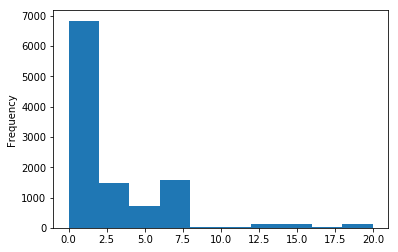

In [176]:
X_train_mvt1['C2'].plot.hist();

In [177]:
X_train_mvt1['C2'] = X_train_mvt1['C2'].astype('object')

X_train_mvt1 = pd.get_dummies(data=X_train_mvt1, columns=['C2'])

print (X_train_mvt1.columns)

Index(['Unique_ID', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3', 'N4',
       'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14',
       'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24',
       'N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32', 'N33', 'N34',
       'N35', 'N25_missing', 'N26_missing', 'N27_missing', 'N28_missing',
       'N29_missing', 'N30_missing', 'N31_missing', 'N32_missing', 'C1_1',
       'C1_2', 'C1_3', 'C2_0', 'C2_1', 'C2_2', 'C2_3', 'C2_4', 'C2_5', 'C2_6',
       'C2_7', 'C2_8', 'C2_9', 'C2_10', 'C2_11', 'C2_12', 'C2_13', 'C2_14',
       'C2_15', 'C2_16', 'C2_17', 'C2_18', 'C2_19', 'C2_20'],
      dtype='object')


#### Analyse col C3

52 int64


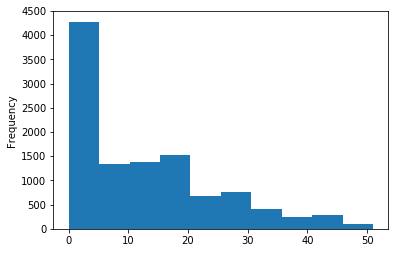

In [178]:
# check no of unique values and dtype of col

print (len(X_train_mvt1['C3'].unique()), X_train_mvt1['C3'].dtype)

X_train_mvt1['C3'].plot.hist();

In [179]:
X_train_mvt1['C3'] = X_train_mvt1['C3'].astype('object')

X_train_mvt1 = pd.get_dummies(data=X_train_mvt1, columns=['C3'])

print (X_train_mvt1.columns)

Index(['Unique_ID', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3', 'N4',
       ...
       'C3_42', 'C3_43', 'C3_44', 'C3_45', 'C3_46', 'C3_47', 'C3_48', 'C3_49',
       'C3_50', 'C3_51'],
      dtype='object', length=125)


#### Analysis of col C4

68 int64


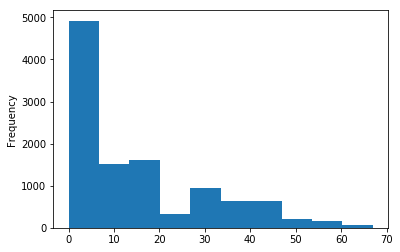

In [180]:
# check no of unique values and dtype of col

print (len(X_train_mvt1['C4'].unique()), X_train_mvt1['C4'].dtype)

X_train_mvt1['C4'].plot.hist();

In [181]:
X_train_mvt1['C4'] = X_train_mvt1['C4'].astype('object')

X_train_mvt1 = pd.get_dummies(data=X_train_mvt1, columns=['C4'])

print (X_train_mvt1.columns)

Index(['Unique_ID', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3', 'N4', 'N5',
       ...
       'C4_58', 'C4_59', 'C4_60', 'C4_61', 'C4_62', 'C4_63', 'C4_64', 'C4_65',
       'C4_66', 'C4_67'],
      dtype='object', length=192)


#### Analysis of col C5

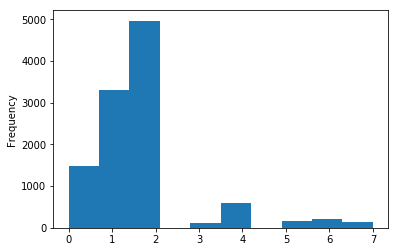

In [182]:
X_train_mvt1['C5'].plot.hist();

In [183]:
print (len(X_train_mvt1['C5'].unique()), X_train_mvt1['C5'].dtype)

8 int64


In [184]:
X_train_mvt1['C5'] = X_train_mvt1['C5'].astype('object')

X_train_mvt1 = pd.get_dummies(data=X_train_mvt1, columns=['C5'])

print (X_train_mvt1.columns)

Index(['Unique_ID', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6',
       ...
       'C4_66', 'C4_67', 'C5_0', 'C5_1', 'C5_2', 'C5_3', 'C5_4', 'C5_5',
       'C5_6', 'C5_7'],
      dtype='object', length=199)


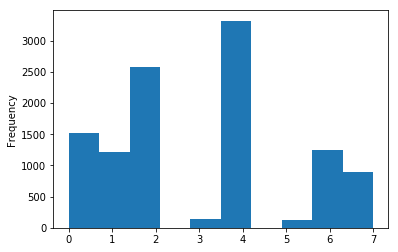

In [185]:
X_train_mvt1['C7'].plot.hist();

In [186]:
print (len(X_train_mvt1['C7'].unique()), X_train_mvt1['C7'].dtype)

8 int64


In [187]:
X_train_mvt1['C7'] = X_train_mvt1['C7'].astype('object')

X_train_mvt1 = pd.get_dummies(data=X_train_mvt1, columns=['C7'])

print (X_train_mvt1.columns)

Index(['Unique_ID', 'C6', 'C8', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7',
       ...
       'C5_6', 'C5_7', 'C7_0', 'C7_1', 'C7_2', 'C7_3', 'C7_4', 'C7_5', 'C7_6',
       'C7_7'],
      dtype='object', length=206)


#### Analysis of col N1

In [188]:
print (len(X_train_mvt1['N1'].unique()), X_train_mvt1['N1'].dtype)

1335 float64


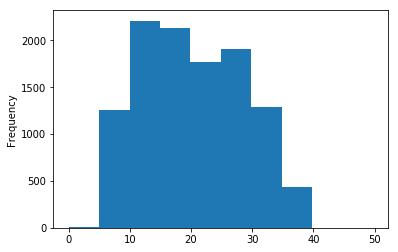

In [189]:
X_train_mvt1['N1'].plot.hist();

N1 has less outliers and no missing values. No special treatment is necessary

#### Analysis of col N2

In [190]:
print (len(X_train_mvt1['N2'].unique()), X_train_mvt1['N2'].dtype)

443 float64


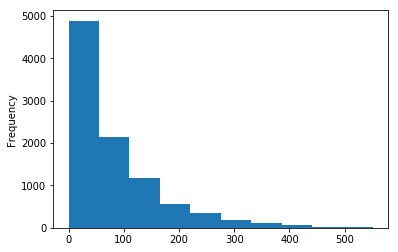

In [191]:
X_train_mvt1['N2'].plot.hist();

N2 has a large number of unique values and 4612 missing values. There are outliers. So we replace by median instead of mean as median is less sensitive to outliers

In [192]:
N2_median = X_train_mvt1['N2'].median(axis=0)


X_train_mvt1['N2'].replace(np.nan, N2_median, inplace=True)

# sanitary check to see that there are no longer any missing values

X_train_mvt1['N2'].describe()['count'] == nrows

True

Outliers are values which are more than 1.5 times upper quartile and lower than 1.5 times lower quartile - [ref](https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/)

212.5


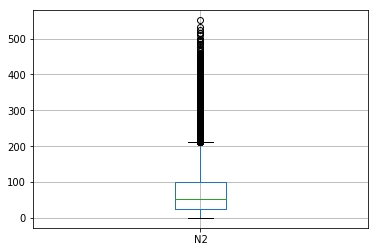

In [193]:
IQR = X_train_mvt1['N2'].quantile(0.75) - X_train_mvt1['N2'].quantile(0.25)

upper_limit = X_train_mvt1['N2'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N2');

So there appears to be no relationship that the outliers of N2 contribute towards the target variable. So it is better to impute the outliers for N2

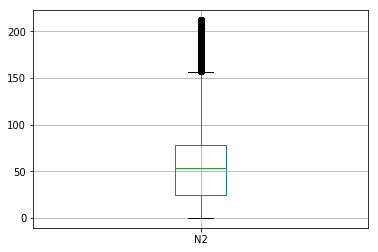

In [194]:
# replace extreme outliers with the median

X_train_mvt1.loc[X_train_mvt1['N2']>upper_limit, 'N2'] = N2_median

X_train_mvt1.boxplot(column='N2');

#### Analysis of col N3

In [195]:
print (len(X_train_mvt1['N3'].unique()), X_train_mvt1['N2'].dtype)

26 float64


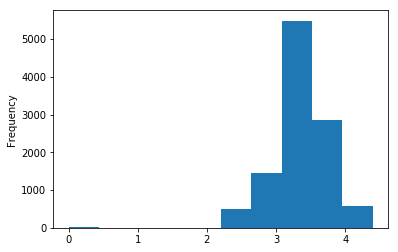

In [196]:
X_train_mvt1['N3'].plot.hist();

From the value counts we can see that there are outliers of 0. So it makes better sense to impute with median

In [197]:
N3_median = X_train_mvt1['N3'].median(axis=0)

X_train_mvt1['N3'].replace(np.nan, N3_median, inplace=True)

X_train_mvt1['N3'].describe()['count'] == nrows

True

2.6000000000000005


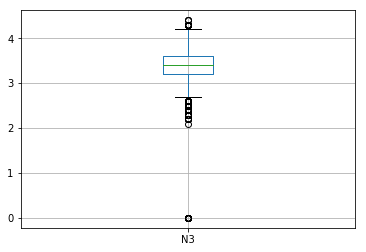

In [198]:
IQR = X_train_mvt1['N3'].quantile(0.75) - X_train_mvt1['N3'].quantile(0.25)

lower_limit = X_train_mvt1['N3'].quantile(0.25) - 1.5*IQR

print (lower_limit)


X_train_mvt1.boxplot(column='N3');

The outliers seem to affect the dist of the target.So we do not impute them

#### Analysis of col N4

In [199]:
print(len(X_train_mvt1['N4'].unique()), X_train_mvt1['N4'].dtype)

44 float64


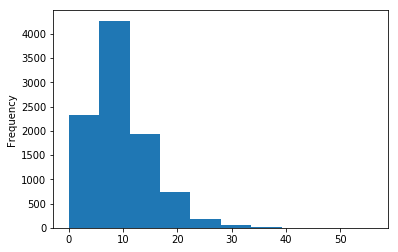

In [200]:
X_train_mvt1['N4'].plot.hist();

Again N4 has a few outliers, so we replace by median

In [201]:
N4_median = X_train_mvt1['N4'].median(axis=0)

X_train_mvt1['N4'].replace(np.nan, N4_median, inplace=True)

X_train_mvt1['N4'].describe()['count'] == nrows

True

21.0


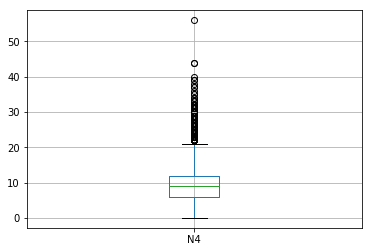

In [202]:
IQR = X_train_mvt1['N4'].quantile(0.75) - X_train_mvt1['N4'].quantile(0.25)

upper_limit = X_train_mvt1['N4'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N4');

So there appears to be no relationship that the outliers of N4 contribute towards the target variable. So it is better to impute the outliers for N4

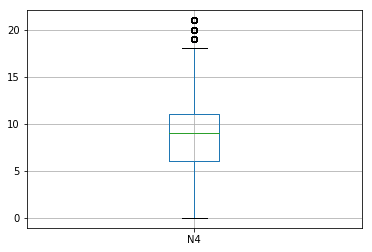

In [203]:
# replace extreme outliers with the median

X_train_mvt1.loc[X_train_mvt1['N4']>upper_limit, 'N4'] = N4_median

X_train_mvt1.boxplot(column='N4');

#### Analysis of col N5

In [204]:
print(len(X_train_mvt1['N5'].unique()), X_train_mvt1['N5'].dtype)

40 float64


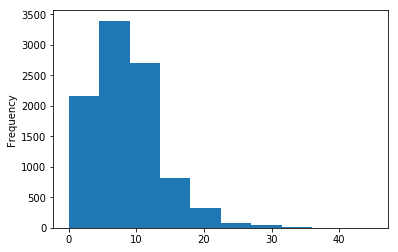

In [205]:
X_train_mvt1['N5'].plot.hist();

In [206]:
N5_median = X_train_mvt1['N5'].median(axis=0)

X_train_mvt1['N5'].replace(np.nan, N5_median, inplace=True)

X_train_mvt1['N5'].describe()['count'] == nrows

True

17.5


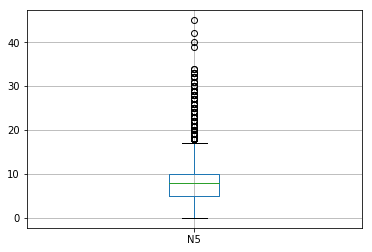

In [207]:
IQR = X_train_mvt1['N5'].quantile(0.75) - X_train_mvt1['N5'].quantile(0.25)

upper_limit = X_train_mvt1['N5'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N5');

So there appears to be no relationship that the outliers of N5 contribute towards the target variable. So it is better to impute the outliers for N5

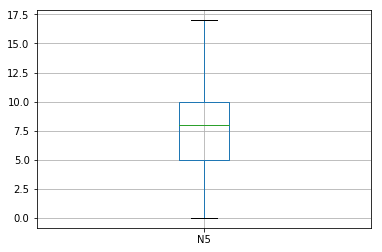

In [208]:
# replace extreme outliers with the median

X_train_mvt1.loc[X_train_mvt1['N5']>upper_limit, 'N5'] = N5_median

X_train_mvt1.boxplot(column='N5');

#### Analysis of col N6

In [209]:
print(len(X_train_mvt1['N6'].unique()), X_train_mvt1['N6'].dtype)

26 float64


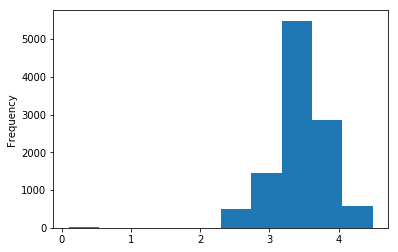

In [210]:
X_train_mvt1['N6'].plot.hist();

N6 and N3 have almost equal distributios

Let us plot them and see if they are linearly related:

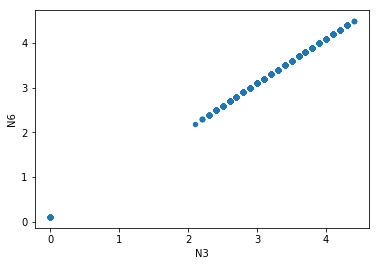

In [211]:
X_train_mvt1.plot(x='N3', y='N6', kind='scatter');

Since they are linearly related we can remove one of them without losing information

In [212]:
X_train_mvt1.drop(columns=['N6'], inplace=True)

#### Analysis of col N7

In [213]:
print(len(X_train_mvt1['N7'].unique()), X_train_mvt1['N7'].dtype)

93 float64


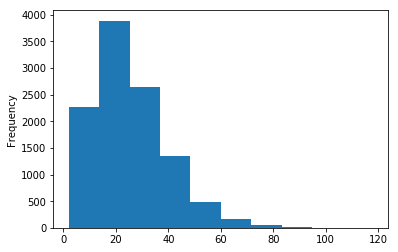

In [214]:
X_train_mvt1['N7'].plot.hist();

Check to see if N5 and N7 are linearly related

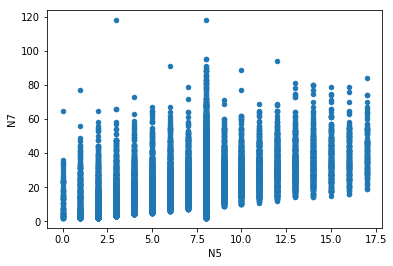

In [215]:
X_train_mvt1.plot(x='N5', y='N7', kind='scatter');

In [216]:
N7_median = X_train_mvt1['N7'].median(axis=0)

X_train_mvt1['N7'].replace(np.nan, N7_median, inplace=True)

X_train_mvt1['N7'].describe()['count'] == nrows

True

60.0


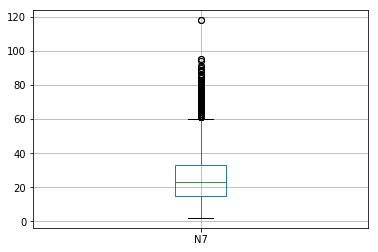

In [217]:
IQR = X_train_mvt1['N7'].quantile(0.75) - X_train_mvt1['N7'].quantile(0.25)

upper_limit = X_train_mvt1['N7'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N7');

So there appears to be no relationship that the outliers of N7 contribute towards the target variable. So it is better to impute the outliers for N7

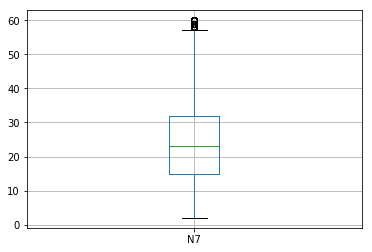

In [218]:
# replace extreme outliers with the median

X_train_mvt1.loc[X_train_mvt1['N7']>upper_limit, 'N7'] = N7_median

X_train_mvt1.boxplot(column='N7');

#### Analysis of col N10

In [219]:
print(len(X_train_mvt1['N10'].unique()), X_train_mvt1['N10'].dtype)

33 float64


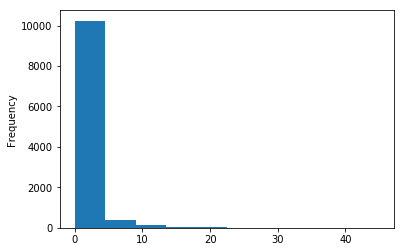

In [220]:
X_train_mvt1['N10'].plot.hist();

73% values are 0. So we replace missing values by 0

Possible 

In [221]:
X_train_mvt1['N10'].replace(np.nan, 0, inplace=True)

X_train_mvt1['N10'].describe()['count'] == nrows

True

2.5


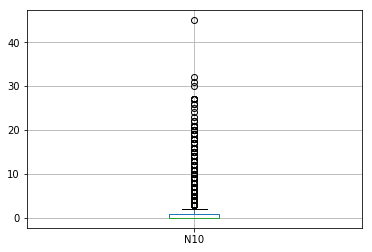

In [222]:
N10_median = X_train_mvt1['N10'].median(axis=0)


IQR = X_train_mvt1['N10'].quantile(0.75) - X_train_mvt1['N10'].quantile(0.25)

upper_limit = X_train_mvt1['N10'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N10');

The outliers seem to affect the dist of the target.So we do not impute them

In [223]:
# print (make_missing_value_dict(X_train_mvt1))

#### Analysis of col N10.1

In [224]:
print(len(X_train_mvt1['N10.1'].unique()), X_train_mvt1['N10.1'].dtype)

40 float64


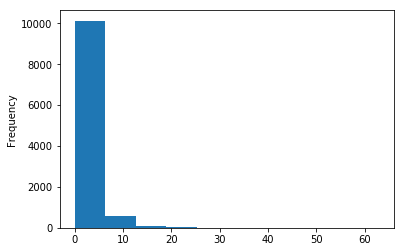

In [225]:
X_train_mvt1['N10.1'].plot.hist();

N10 and N10.1 seem similar columns.. So we explore them more

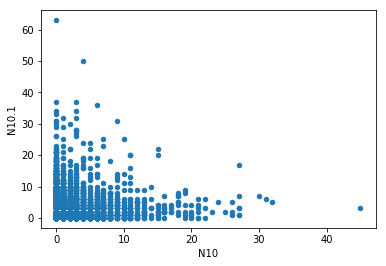

In [226]:
X_train_mvt1.plot(x='N10', y='N10.1', kind='scatter');

In [227]:
# perasons correlation

X_train_mvt1[['N10', 'N10.1']].corr()

,N10,N10.1
N10,1.000000,0.124941
N10.1,0.124941,1.000000


In [228]:
X_train_mvt1['N10.1'].value_counts(normalize=True)

0.0     0.350937
1.0     0.234662
2.0     0.147869
3.0     0.082292
4.0     0.054831
5.0     0.035819
6.0     0.023696
7.0     0.016624
8.0     0.012215
9.0     0.009184
10.0    0.007715
11.0    0.004684
12.0    0.004133
14.0    0.003031
13.0    0.002021
17.0    0.001378
16.0    0.001286
15.0    0.001286
19.0    0.001010
18.0    0.000918
21.0    0.000643
22.0    0.000551
20.0    0.000367
31.0    0.000276
25.0    0.000276
23.0    0.000276
26.0    0.000276
32.0    0.000184
28.0    0.000184
24.0    0.000184
34.0    0.000184
29.0    0.000184
30.0    0.000184
37.0    0.000184
33.0    0.000092
50.0    0.000092
36.0    0.000092
27.0    0.000092
63.0    0.000092
Name: N10.1, dtype: float64

In [229]:
N10_1_median = X_train_mvt1['N10.1'].median(axis=0)

X_train_mvt1['N10.1'].replace(np.nan, N10_1_median, inplace=True)

X_train_mvt1['N10.1'].describe()['count'] == nrows

True

7.5


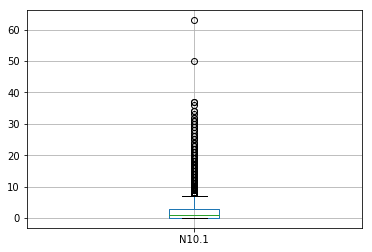

In [230]:
IQR = X_train_mvt1['N10.1'].quantile(0.75) - X_train_mvt1['N10.1'].quantile(0.25)

upper_limit = X_train_mvt1['N10.1'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N10.1');

So there appears to be no relationship that the outliers of N10.1 contribute towards the target variable. So it is better to impute the outliers for N10.1

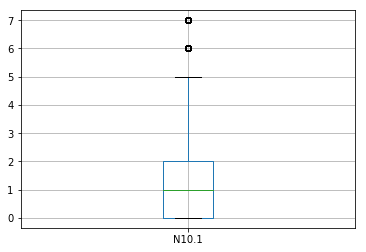

In [231]:
# replace extreme outliers with the median

X_train_mvt1.loc[X_train_mvt1['N10.1']>upper_limit, 'N10.1'] = N10_1_median

X_train_mvt1.boxplot(column='N10.1');

In [232]:
# print (make_missing_value_dict(X_train_mvt1))

#### Analysis of col N11

In [233]:
print(len(X_train_mvt1['N11'].unique()), X_train_mvt1['N11'].dtype)

79 float64


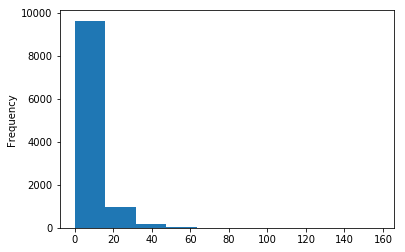

In [234]:
X_train_mvt1['N11'].plot.hist();

In [235]:
N11_median = X_train_mvt1['N11'].median(axis=0)

X_train_mvt1['N11'].replace(np.nan, N11_median, inplace=True)

X_train_mvt1['N11'].describe()['count'] == nrows

True

19.5


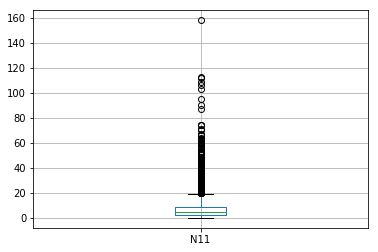

In [236]:
IQR = X_train_mvt1['N11'].quantile(0.75) - X_train_mvt1['N11'].quantile(0.25)

upper_limit = X_train_mvt1['N11'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N11');

#### Analysis of col N12

In [237]:
print(len(X_train_mvt1['N12'].unique()), X_train_mvt1['N12'].dtype)

1457 float64


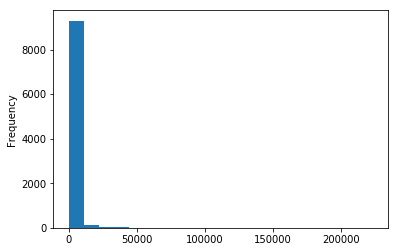

In [238]:
X_train_mvt1['N12'].plot.hist(bins = 20);

In [239]:
X_train_mvt1['N12'].value_counts(normalize=True)

0.0         0.803905
50.0        0.000735
60.0        0.000630
81.0        0.000630
67.0        0.000630
130.0       0.000630
40.0        0.000525
35.0        0.000525
100.0       0.000525
25.0        0.000525
45.0        0.000525
84.0        0.000525
66.0        0.000420
102.0       0.000420
176.0       0.000420
27.0        0.000420
281.0       0.000420
72.0        0.000420
209.0       0.000420
129.0       0.000420
186.0       0.000420
255.0       0.000420
78.0        0.000420
248.0       0.000420
31.0        0.000420
63.0        0.000420
245.0       0.000420
75.0        0.000420
79.0        0.000420
65.0        0.000420
              ...   
57979.0     0.000105
11744.0     0.000105
223738.0    0.000105
14094.0     0.000105
296.0       0.000105
2416.0      0.000105
2368.0      0.000105
436.0       0.000105
932.0       0.000105
827.0       0.000105
5454.0      0.000105
996.0       0.000105
26931.0     0.000105
3268.0      0.000105
1364.0      0.000105
221.0       0.000105
2608.0      0

Almost 81% of the values are 0. So we simply replace missing values with 0 for N12

In [240]:
X_train_mvt1['N12'].replace(np.nan, 0, inplace=True)

X_train_mvt1['N12'].describe()['count'] == nrows

True

0.0


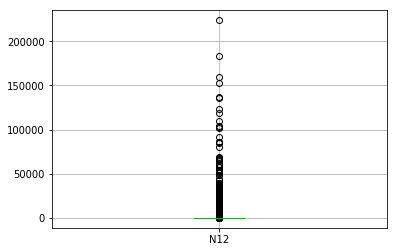

In [241]:
N12_median = X_train_mvt1['N12'].median(axis=0)

IQR = X_train_mvt1['N12'].quantile(0.75) - X_train_mvt1['N12'].quantile(0.25)

upper_limit = X_train_mvt1['N12'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N12');

So there appears to be no relationship that the outliers of N12 contribute towards the target variable. So it is better to impute the outliers for N12

But this results in all values of N12 becoming 0 so we do not do this and leave N12 as it is

In [242]:
# print (make_missing_value_dict(X_train_mvt1))

#### Analysis of col N14

In [243]:
print(len(X_train_mvt1['N14'].unique()), X_train_mvt1['N14'].dtype)

89 float64


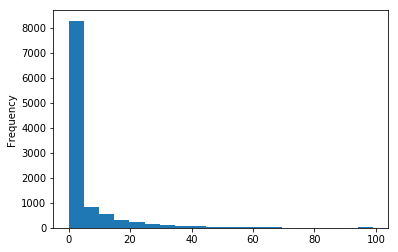

In [244]:
X_train_mvt1['N14'].plot.hist(bins = 20);

In [245]:
N14_median = X_train_mvt1['N14'].median(axis=0)

X_train_mvt1['N14'].replace(np.nan, N14_median, inplace=True)

X_train_mvt1['N14'].describe()['count'] == nrows

True

10.0


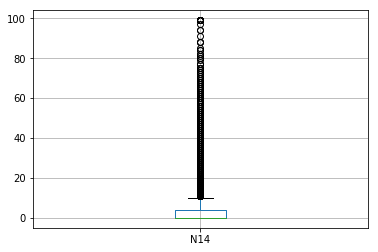

In [246]:
IQR = X_train_mvt1['N14'].quantile(0.75) - X_train_mvt1['N14'].quantile(0.25)

upper_limit = X_train_mvt1['N14'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N14');

The outliers seem to affect the dist of the target.So we do not impute them

#### Analysis of col N15

In [247]:
print(len(X_train_mvt1['N15'].unique()), X_train_mvt1['N15'].dtype)

14 float64


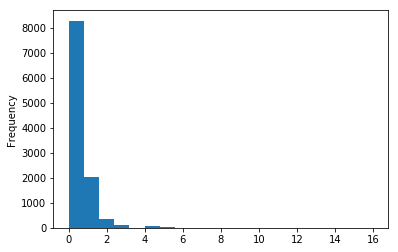

In [248]:
X_train_mvt1['N15'].plot.hist(bins = 20);

In [249]:
X_train_mvt1['N15'].value_counts(normalize=True)

0.0     0.760562
1.0     0.187730
2.0     0.031594
3.0     0.010195
4.0     0.005694
5.0     0.001745
6.0     0.000827
8.0     0.000551
7.0     0.000367
9.0     0.000184
11.0    0.000184
14.0    0.000184
16.0    0.000184
Name: N15, dtype: float64

Almost 77% of the values are 0. So we simply replace missing values with 0 for N15

Only 20 distinct values. So we one hot encode them and treat them as categories

In [250]:
N15_median = X_train_mvt1['N15'].median(axis=0)

X_train_mvt1['N15'].replace(np.nan, 0, inplace=True)

X_train_mvt1['N15'].describe()['count'] == nrows

True

0.0


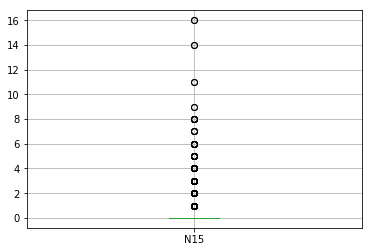

In [251]:
IQR = X_train_mvt1['N15'].quantile(0.75) - X_train_mvt1['N15'].quantile(0.25)

upper_limit = X_train_mvt1['N15'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N15');

#### Analysis of col N16

In [252]:
print(len(X_train_mvt1['N16'].unique()), X_train_mvt1['N16'].dtype)

6 float64


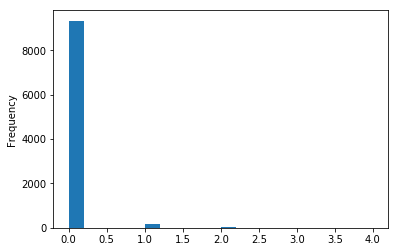

In [253]:
X_train_mvt1['N16'].plot.hist(bins = 20);

In [254]:
X_train_mvt1['N16'].value_counts(normalize=True)

0.0    0.979851
1.0    0.017421
2.0    0.001889
3.0    0.000525
4.0    0.000315
Name: N16, dtype: float64

Only 7 distinct values. So we one hot encode them and treat them as categories

In [255]:
X_train_mvt1['N16'] = X_train_mvt1['N16'].astype('object')

X_train_mvt1 = pd.get_dummies(data=X_train_mvt1, columns=['N16'])

print (X_train_mvt1.columns)

Index(['Unique_ID', 'C6', 'C8', 'N1', 'N2', 'N3', 'N4', 'N5', 'N7', 'N8',
       ...
       'C7_3', 'C7_4', 'C7_5', 'C7_6', 'C7_7', 'N16_0.0', 'N16_1.0', 'N16_2.0',
       'N16_3.0', 'N16_4.0'],
      dtype='object', length=209)


In [256]:
# print (make_missing_value_dict(X_train_mvt1))

#### Analysis of col N17

In [257]:
print(len(X_train_mvt1['N17'].unique()), X_train_mvt1['N17'].dtype)

7309 float64


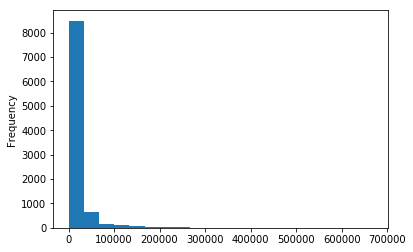

In [258]:
X_train_mvt1['N17'].plot.hist(bins = 20);

In [259]:
X_train_mvt1['N17'].value_counts(normalize=True)

0.0         0.069682
500.0       0.000630
55.0        0.000630
521.0       0.000525
66.0        0.000525
473.0       0.000525
528.0       0.000525
459.0       0.000525
25.0        0.000525
197.0       0.000525
1159.0      0.000525
3823.0      0.000420
290.0       0.000420
325.0       0.000420
855.0       0.000420
760.0       0.000420
142.0       0.000420
122.0       0.000420
326.0       0.000420
438.0       0.000420
287.0       0.000420
1045.0      0.000420
861.0       0.000420
1616.0      0.000420
1513.0      0.000420
804.0       0.000420
758.0       0.000420
783.0       0.000420
380.0       0.000420
929.0       0.000420
              ...   
105613.0    0.000105
12837.0     0.000105
19395.0     0.000105
62023.0     0.000105
4623.0      0.000105
27599.0     0.000105
5891.0      0.000105
5283.0      0.000105
39272.0     0.000105
271.0       0.000105
186.0       0.000105
103.0       0.000105
141574.0    0.000105
10219.0     0.000105
198.0       0.000105
340.0       0.000105
18209.0     0

In [260]:
N17_median = X_train_mvt1['N17'].median(axis=0)

X_train_mvt1['N17'].replace(np.nan, N17_median, inplace=True)

X_train_mvt1['N17'].describe()['count'] == nrows

True

31622.0


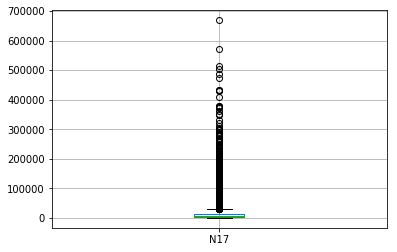

In [261]:
IQR = X_train_mvt1['N17'].quantile(0.75) - X_train_mvt1['N17'].quantile(0.25)

upper_limit = X_train_mvt1['N17'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N17');

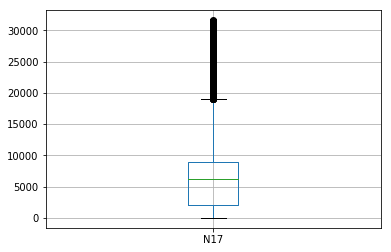

In [262]:
# replace extreme outliers with the median

X_train_mvt1.loc[X_train_mvt1['N17']>upper_limit, 'N17'] = N17_median

X_train_mvt1.boxplot(column='N17');

#### Analysis of col N4

In [263]:
print(len(X_train_mvt1['N18'].unique()), X_train_mvt1['N18'].dtype)

148 float64


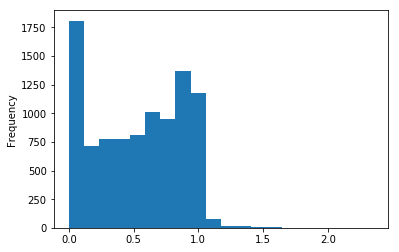

In [264]:
X_train_mvt1['N18'].plot.hist(bins = 20);

In [265]:
N18_median = X_train_mvt1['N18'].median(axis=0)

X_train_mvt1['N18'].replace(np.nan, N18_median, inplace=True)

X_train_mvt1['N18'].describe()['count'] == nrows

True

1.62


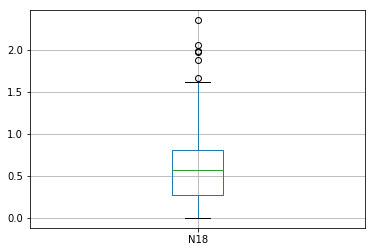

In [266]:
IQR = X_train_mvt1['N18'].quantile(0.75) - X_train_mvt1['N18'].quantile(0.25)

upper_limit = X_train_mvt1['N18'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N18');

The outliers seem to affect the dist of the target.So we do not impute them

#### Analysis of col N19

In [267]:
print(len(X_train_mvt1['N19'].unique()), X_train_mvt1['N19'].dtype)

6252 float64


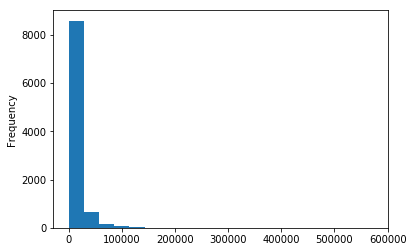

In [268]:
X_train_mvt1['N19'].plot.hist(bins = 20);

In [269]:
N19_median = X_train_mvt1['N19'].median(axis=0)

X_train_mvt1['N19'].replace(np.nan, N19_median, inplace=True)

X_train_mvt1['N19'].describe()['count'] == nrows

True

23400.0


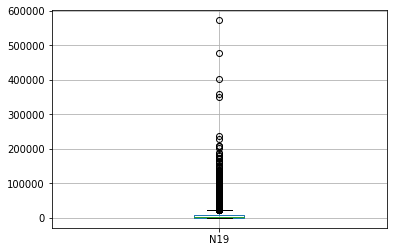

In [270]:
IQR = X_train_mvt1['N19'].quantile(0.75) - X_train_mvt1['N19'].quantile(0.25)

upper_limit = X_train_mvt1['N19'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N19');

The outliers seem to affect the dist of the target.So we do not impute them

In [271]:
# print (make_missing_value_dict(X_train_mvt1))

#### Analysis of col N20

In [272]:
print(len(X_train_mvt1['N20'].unique()), X_train_mvt1['N20'].dtype)

87 float64


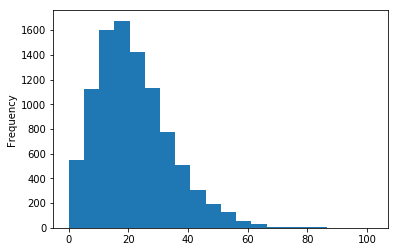

In [273]:
X_train_mvt1['N20'].plot.hist(bins = 20);

In [274]:
N20_median = X_train_mvt1['N20'].median(axis=0)

X_train_mvt1['N20'].replace(np.nan, N20_median, inplace=True)

X_train_mvt1['N20'].describe()['count'] == nrows

True

46.5


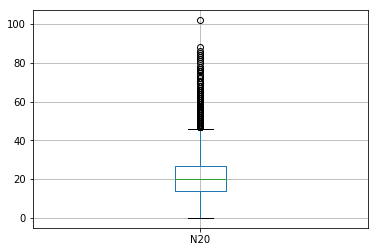

In [275]:
IQR = X_train_mvt1['N20'].quantile(0.75) - X_train_mvt1['N20'].quantile(0.25)

upper_limit = X_train_mvt1['N20'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N20');

The outliers seem to affect the dist of the target.So we do not impute them

#### Analysis of col N21

In [276]:
print(len(X_train_mvt1['N21'].unique()), X_train_mvt1['N21'].dtype)

94 float64


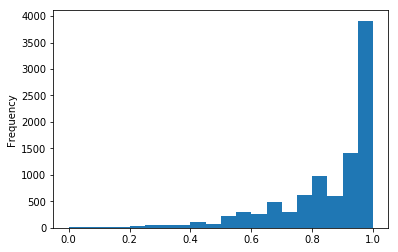

In [277]:
X_train_mvt1['N21'].plot.hist(bins = 20);

In [278]:
N21_median = X_train_mvt1['N21'].median(axis=0)

X_train_mvt1['N21'].replace(np.nan, N21_median, inplace=True)

X_train_mvt1['N21'].describe()['count'] == nrows

True

0.5000000000000001


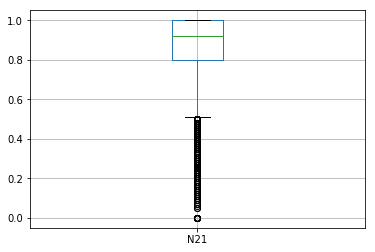

In [279]:
IQR = X_train_mvt1['N21'].quantile(0.75) - X_train_mvt1['N21'].quantile(0.25)

lower_limit = X_train_mvt1['N21'].quantile(0.25) - 1.5*IQR

print (lower_limit)


X_train_mvt1.boxplot(column='N21');

The outliers seem to affect the dist of the target.So we do not impute them

#### Analysis of col N22

In [280]:
print(len(X_train_mvt1['N22'].unique()), X_train_mvt1['N22'].dtype)

17 float64


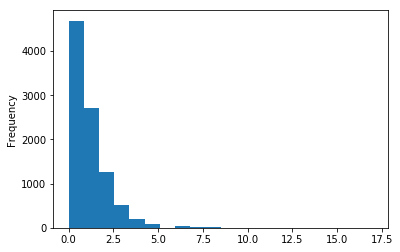

In [281]:
X_train_mvt1['N22'].plot.hist(bins = 20);

In [282]:
X_train_mvt1['N22'].value_counts(normalize=True)

0.0     0.490991
1.0     0.283889
2.0     0.131469
3.0     0.053740
4.0     0.020951
5.0     0.009847
6.0     0.004190
7.0     0.001990
8.0     0.000943
9.0     0.000524
11.0    0.000419
10.0    0.000419
12.0    0.000314
13.0    0.000105
17.0    0.000105
14.0    0.000105
Name: N22, dtype: float64

In [283]:
X_train_mvt1['N22'] = X_train_mvt1['N22'].astype('object')

X_train_mvt1 = pd.get_dummies(data=X_train_mvt1, columns=['N22'])

print (X_train_mvt1.columns)

Index(['Unique_ID', 'C6', 'C8', 'N1', 'N2', 'N3', 'N4', 'N5', 'N7', 'N8',
       ...
       'N22_6.0', 'N22_7.0', 'N22_8.0', 'N22_9.0', 'N22_10.0', 'N22_11.0',
       'N22_12.0', 'N22_13.0', 'N22_14.0', 'N22_17.0'],
      dtype='object', length=224)


#### Analysis of col N23

In [284]:
print(len(X_train_mvt1['N23'].unique()), X_train_mvt1['N23'].dtype)

324 float64


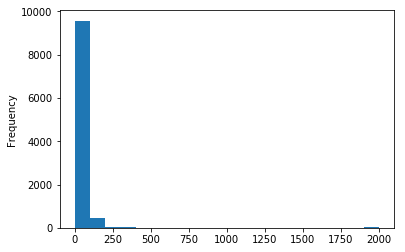

In [285]:
X_train_mvt1['N23'].plot.hist(bins = 20);

In [286]:
X_train_mvt1['N23'].value_counts(normalize=True)

36.000      0.038552
32.000      0.035012
28.000      0.033733
38.000      0.032848
34.000      0.032160
30.000      0.031963
40.000      0.031570
26.000      0.031275
22.000      0.029996
44.000      0.029996
42.000      0.029013
24.000      0.028816
20.000      0.027439
16.000      0.026161
48.000      0.025177
46.000      0.022620
18.000      0.022522
50.000      0.022227
56.000      0.022227
14.000      0.021341
54.000      0.021145
52.000      0.020653
10.000      0.020555
64.000      0.019670
12.000      0.019178
62.000      0.018489
60.000      0.017998
58.000      0.017014
8.000       0.016227
66.000      0.015736
              ...   
23.832      0.000098
26.816      0.000098
83.172      0.000098
37.440      0.000098
11.038      0.000098
35.484      0.000098
31.282      0.000098
10.878      0.000098
3.078       0.000098
1004.000    0.000098
11.948      0.000098
12.220      0.000098
762.000     0.000098
16.670      0.000098
348.000     0.000098
33.146      0.000098
42.354      0

In [287]:
N23_median = X_train_mvt1['N23'].median(axis=0)

X_train_mvt1['N23'].replace(np.nan, N23_median, inplace=True)

X_train_mvt1['N23'].describe()['count'] == nrows

True

106.0


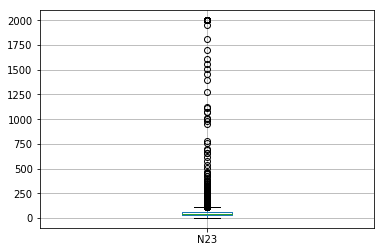

In [288]:
IQR = X_train_mvt1['N23'].quantile(0.75) - X_train_mvt1['N23'].quantile(0.25)

upper_limit = X_train_mvt1['N23'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N23');

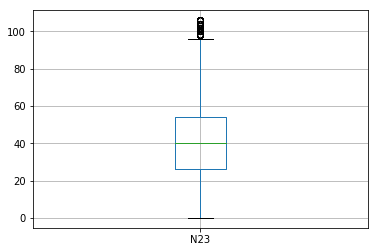

In [289]:
# replace extreme outliers with the median

X_train_mvt1.loc[X_train_mvt1['N23']>upper_limit, 'N23'] = N23_median

X_train_mvt1.boxplot(column='N23');

In [290]:
print (make_missing_value_dict(X_train_mvt1))

{'C6': 0, 'C8': 0, 'N1': 0, 'N2': 0, 'N3': 0, 'N4': 0, 'N5': 0, 'N7': 0, 'N8': 0, 'N9': 0, 'N10': 0, 'N10.1': 0, 'N11': 0, 'N12': 0, 'N14': 0, 'N15': 0, 'N17': 0, 'N18': 0, 'N19': 0, 'N20': 0, 'N21': 0, 'N23': 0, 'N24': 0, 'N25': 0, 'N26': 0, 'N27': 0, 'N28': 0, 'N29': 0, 'N30': 0, 'N31': 0, 'N32': 0, 'N33': 0, 'N34': 0, 'N35': 129, 'N25_missing': 0, 'N26_missing': 0, 'N27_missing': 0, 'N28_missing': 0, 'N29_missing': 0, 'N30_missing': 0, 'N31_missing': 0, 'N32_missing': 0, 'C1_1': 0, 'C1_2': 0, 'C1_3': 0, 'C2_0': 0, 'C2_1': 0, 'C2_2': 0, 'C2_3': 0, 'C2_4': 0, 'C2_5': 0, 'C2_6': 0, 'C2_7': 0, 'C2_8': 0, 'C2_9': 0, 'C2_10': 0, 'C2_11': 0, 'C2_12': 0, 'C2_13': 0, 'C2_14': 0, 'C2_15': 0, 'C2_16': 0, 'C2_17': 0, 'C2_18': 0, 'C2_19': 0, 'C2_20': 0, 'C3_0': 0, 'C3_1': 0, 'C3_2': 0, 'C3_3': 0, 'C3_4': 0, 'C3_5': 0, 'C3_6': 0, 'C3_7': 0, 'C3_8': 0, 'C3_9': 0, 'C3_10': 0, 'C3_11': 0, 'C3_12': 0, 'C3_13': 0, 'C3_14': 0, 'C3_15': 0, 'C3_16': 0, 'C3_17': 0, 'C3_18': 0, 'C3_19': 0, 'C3_20': 0, 'C3_

#### Analysis of col N24

In [291]:
print(len(X_train_mvt1['N24'].unique()), X_train_mvt1['N24'].dtype)

2483 float64


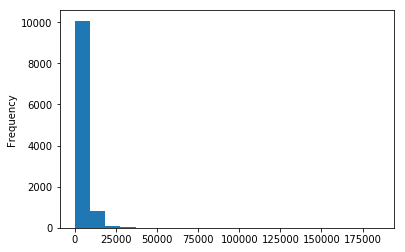

In [292]:
X_train_mvt1['N24'].plot.hist(bins = 20);

11450.0000005


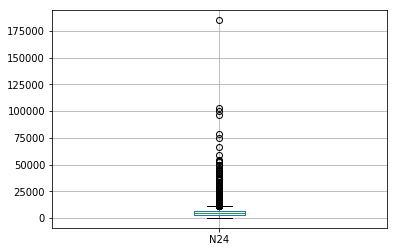

In [293]:
IQR = X_train_mvt1['N24'].quantile(0.75) - X_train_mvt1['N24'].quantile(0.25)

upper_limit = X_train_mvt1['N24'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N24');

So there appears to be no relationship that the outliers of N24 contribute towards the target variable. So it is better to impute the outliers for N24

But this results in all values of N24 becoming 0 so we do not do this and leave N12 as it is

In [294]:
# print (make_missing_value_dict(X_train_mvt1))

The cols: N25-N32 have laready been analyzed

#### Analysis of col N33

In [295]:
print(len(X_train_mvt1['N33'].unique()), X_train_mvt1['N33'].dtype)

549 float64


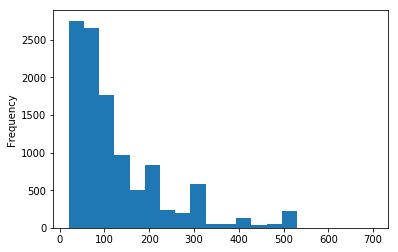

In [296]:
X_train_mvt1['N33'].plot.hist(bins = 20);

In [297]:
N33_median = X_train_mvt1['N33'].median(axis=0)

X_train_mvt1['N33'].replace(np.nan, N33_median, inplace=True)

X_train_mvt1['N33'].describe()['count'] == nrows

True

319.0


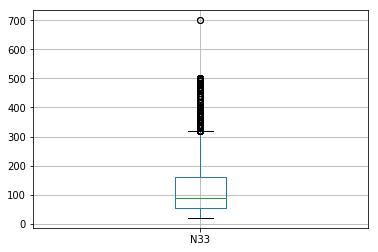

In [298]:
IQR = X_train_mvt1['N33'].quantile(0.75) - X_train_mvt1['N33'].quantile(0.25)

upper_limit = X_train_mvt1['N33'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N33');

The outliers seem to affect the dist of the target.So we do not impute them

#### Analysis of col N34

In [299]:
print(len(X_train_mvt1['N34'].unique()), X_train_mvt1['N34'].dtype)

6293 float64


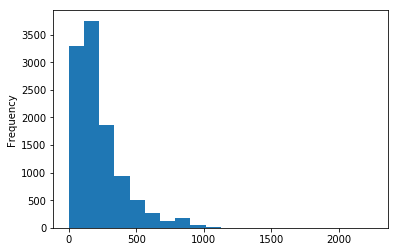

In [300]:
X_train_mvt1['N34'].plot.hist(bins = 20);

607.24


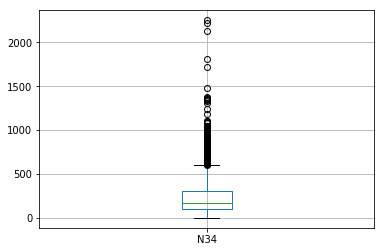

In [301]:
IQR = X_train_mvt1['N34'].quantile(0.75) - X_train_mvt1['N34'].quantile(0.25)

upper_limit = X_train_mvt1['N34'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N34');

The outliers seem to affect the dist of the target.So we do not impute them

#### Analysis of col N35

In [302]:
print(len(X_train_mvt1['N35'].unique()), X_train_mvt1['N35'].dtype)

56 float64


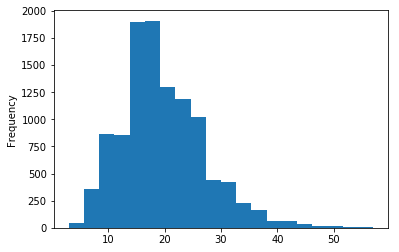

In [303]:
X_train_mvt1['N35'].plot.hist(bins = 20);

In [304]:
N35_median = X_train_mvt1['N35'].median(axis=0)

X_train_mvt1['N35'].replace(np.nan, N35_median, inplace=True)

X_train_mvt1['N35'].describe()['count'] == nrows

True

37.5


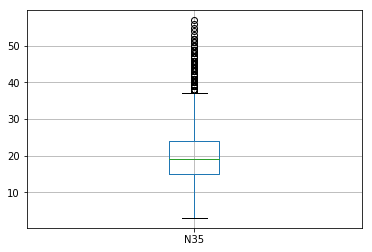

In [305]:
IQR = X_train_mvt1['N35'].quantile(0.75) - X_train_mvt1['N35'].quantile(0.25)

upper_limit = X_train_mvt1['N35'].quantile(0.75) + 1.5*IQR

print (upper_limit)

X_train_mvt1.boxplot(column='N35');

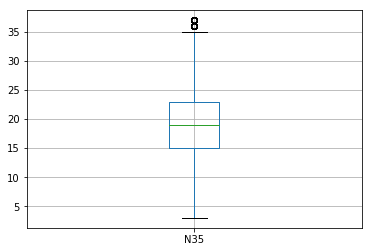

In [306]:
# replace extreme outliers with the median

X_train_mvt1.loc[X_train_mvt1['N35']>upper_limit, 'N35'] = N35_median

X_train_mvt1.boxplot(column='N35');

At this stage we have analyzed each column separately

1. No missing values present
2. Outliers treated depending on whether they are important or not
3. Possible categorical variables encoded

In [307]:
# check to see that no missing values are present
print (sum(make_missing_value_dict(X_train_mvt1).values())==0)

True


In [308]:
X_train_mvt1.describe()

,N1,N2,N3,N4,N5,N7,N8,N9,N10,N10.1,...,N22_6.0,N22_7.0,N22_8.0,N22_9.0,N22_10.0,N22_11.0,N22_12.0,N22_13.0,N22_14.0,N22_17.0
count,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,...,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000,11017.000000
mean,20.092037,60.029228,3.360470,8.975129,7.692748,24.311700,6.066897,327.284560,0.882454,1.481801,...,0.003631,0.001725,0.000817,0.000454,0.000363,0.000363,0.000272,0.000091,0.000091,0.000091
std,8.149355,47.013605,0.402057,4.251545,3.579207,12.471739,4.532078,446.366043,2.466419,1.678515,...,0.060149,0.041494,0.028571,0.021300,0.019052,0.019052,0.016500,0.009527,0.009527,0.009527
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.500000,25.000000,3.200000,6.000000,5.000000,15.000000,3.000000,60.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.500000,53.000000,3.400000,9.000000,8.000000,23.000000,5.000000,185.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.990000,78.000000,3.600000,11.000000,10.000000,32.000000,8.000000,418.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49.750000,212.000000,4.400000,21.000000,17.000000,60.000000,47.000000,8001.000000,45.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [309]:
X_train_mvt1.drop(columns=['Unique_ID'], inplace=True)

### One Hot Encoding of categorical columns: C6 and C8

In [310]:
X_train_mvt1['C6'] = X_train_mvt1['C6'].astype('object')

X_train_mvt1['C8'] = X_train_mvt1['C8'].astype('object')

In [311]:
X_train_mvt1.head()

,C6,C8,N1,N2,N3,N4,N5,N7,N8,N9,...,N22_6.0,N22_7.0,N22_8.0,N22_9.0,N22_10.0,N22_11.0,N22_12.0,N22_13.0,N22_14.0,N22_17.0
0,True,True,18.00,53.0,3.2,9.0,8.0,27.0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,True,True,16.75,107.0,3.7,7.0,4.0,19.0,4,522,...,0,0,0,0,0,0,0,0,0,0
2,False,True,29.99,45.0,3.2,5.0,4.0,49.0,3,79,...,0,0,0,0,0,0,0,0,0,0
3,False,True,17.70,20.0,3.3,7.0,6.0,10.0,5,299,...,0,0,0,0,0,0,0,0,0,0
4,False,False,28.00,2.0,3.0,20.0,8.0,34.0,12,396,...,0,0,0,0,0,0,0,0,0,0


In [312]:
X_train_mvt1_enc = pd.get_dummies(data=X_train_mvt1, columns=['C6'])

X_train_mvt1_enc = pd.get_dummies(data=X_train_mvt1_enc, columns=['C8'])


print (X_train_mvt1_enc.columns)

Index(['N1', 'N2', 'N3', 'N4', 'N5', 'N7', 'N8', 'N9', 'N10', 'N10.1',
       ...
       'N22_10.0', 'N22_11.0', 'N22_12.0', 'N22_13.0', 'N22_14.0', 'N22_17.0',
       'C6_False', 'C6_True', 'C8_False', 'C8_True'],
      dtype='object', length=225)


### Standardization and Min-max scaling

We try Standardization (which makes mean=0 and std=1) and MinMax Scaling (which changes the range of each col to [0,1])

Both approaches achieve similar performance improvements 


In [313]:
from sklearn import preprocessing

standardScaler = False
minMaxScaler = True

if standardScaler:
    scaler = preprocessing.StandardScaler()
else:
    scaler = preprocessing.MinMaxScaler()


X_train_mvt1_enc_values = X_train_mvt1_enc.values

X_train_mvt1_enc_values_scaled = scaler.fit_transform(X_train_mvt1_enc_values)

X_train_mvt1_enc_values_scaled = pd.DataFrame(data=X_train_mvt1_enc_values_scaled)

X_train_mvt1_enc_values_scaled.max()


/home/shaunak/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
195    1.0
196    1.0
197    1.0
198    1.0
199    1.0
200    1.0
201    1.0
202    1.0
203    1.0
204    1.0
205    1.0
206    1.0
207    1.0
208    1.0
209    1.0
210    1.0
211    1.0
212    1.0
213    1.0
214    1.0
215    1.0
216    1.0
217    1.0
218    1.0
219    1.0
220    1.0
221    1.0
222    1.0
223    1.0
224    1.0
Length: 225, dtype: float64

In [314]:
# set the columns

X_train_mvt1_enc_values_scaled.columns = X_train_mvt1_enc.columns

In [315]:
X_train_mvt1_enc_values_scaled.head()

,N1,N2,N3,N4,N5,N7,N8,N9,N10,N10.1,...,N22_10.0,N22_11.0,N22_12.0,N22_13.0,N22_14.0,N22_17.0,C6_False,C6_True,C8_False,C8_True
0,0.361809,0.250000,0.727273,0.428571,0.470588,0.431034,0.042553,0.000000,0.066667,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.336683,0.504717,0.840909,0.333333,0.235294,0.293103,0.085106,0.065242,0.000000,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.602814,0.212264,0.727273,0.238095,0.235294,0.810345,0.063830,0.009874,0.000000,0.714286,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.355779,0.094340,0.750000,0.333333,0.352941,0.137931,0.106383,0.037370,0.022222,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.562814,0.009434,0.681818,0.952381,0.470588,0.551724,0.255319,0.049494,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [316]:
X_train_mvt1_enc_values_scaled.to_csv(path_or_buf='./Test/X_test_clean.csv')